# Drowsiness Detection using CNNs and transfer learning
The goal of this project is to make a system to detect drowisness in vehicle drivers. To do so various methods can be adopted like brainwave sensors and camera based eyes detection. In this notebook, we build a model to identify and localise eyes in it different states like open and closed eyes. If the system detects the eyes closed for more than 5 frames it alerts the person with a beeping noise.

### Methodogly
1. Download and load data for training model
2. Data pre processing - normalise data, load into numpy array, resize images
3. Training model - MobileNet for 5 epochs - Mobile net uses CNNs (see model summary)
4. Prediction and fine tuning
5. Integration with live video footage

In [19]:
# import dependencies for the whole project
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

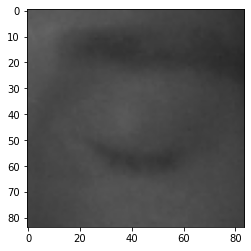

In [20]:
# training data demonstration
img_array = cv2.imread("train\closed\s0001_00002_0_0_0_0_0_01.png") # reading the image
plt.imshow(img_array , cmap="gray")

In [21]:
# read all images from folder and convert them to array of data and labels(classes)
datadir = "train/"
classes = ["closed", "open"] # defining 2 states, this is what the model will predict
img_size = 224
training_data = []

def training():
    for category in classes:
        path = os.path.join(datadir, category)
        class_num  = classes.index(category)
        counter = 1900 # setting a limit on training data, this is done because the dataset has 80k images and will be harder to compute on a laptop
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img) , cv2.IMREAD_GRAYSCALE) # read each image
                rgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) #convert to RGB
                new_array = cv2.resize(rgb, (img_size, img_size)) # resize to fit
                training_data.append([new_array ,class_num]) # add to training list
                counter-=1
                print(counter)
                if counter == 0:
                    break
            except Exception as e:
                pass
training()

1899
1898
1897
1896
1895
1894
1893
1892
1891
1890
1889
1888
1887
1886
1885
1884
1883
1882
1881
1880
1879
1878
1877
1876
1875
1874
1873
1872
1871
1870
1869
1868
1867
1866
1865
1864
1863
1862
1861
1860
1859
1858
1857
1856
1855
1854
1853
1852
1851
1850
1849
1848
1847
1846
1845
1844
1843
1842
1841
1840
1839
1838
1837
1836
1835
1834
1833
1832
1831
1830
1829
1828
1827
1826
1825
1824
1823
1822
1821
1820
1819
1818
1817
1816
1815
1814
1813
1812
1811
1810
1809
1808
1807
1806
1805
1804
1803
1802
1801
1800
1799
1798
1797
1796
1795
1794
1793
1792
1791
1790
1789
1788
1787
1786
1785
1784
1783
1782
1781
1780
1779
1778
1777
1776
1775
1774
1773
1772
1771
1770
1769
1768
1767
1766
1765
1764
1763
1762
1761
1760
1759
1758
1757
1756
1755
1754
1753
1752
1751
1750
1749
1748
1747
1746
1745
1744
1743
1742
1741
1740
1739
1738
1737
1736
1735
1734
1733
1732
1731
1730
1729
1728
1727
1726
1725
1724
1723
1722
1721
1720
1719
1718
1717
1716
1715
1714
1713
1712
1711
1710
1709
1708
1707
1706
1705
1704
1703
1702
1701
1700


12
11
10
9
8
7
6
5
4
3
2
1
0
1899
1898
1897
1896
1895
1894
1893
1892
1891
1890
1889
1888
1887
1886
1885
1884
1883
1882
1881
1880
1879
1878
1877
1876
1875
1874
1873
1872
1871
1870
1869
1868
1867
1866
1865
1864
1863
1862
1861
1860
1859
1858
1857
1856
1855
1854
1853
1852
1851
1850
1849
1848
1847
1846
1845
1844
1843
1842
1841
1840
1839
1838
1837
1836
1835
1834
1833
1832
1831
1830
1829
1828
1827
1826
1825
1824
1823
1822
1821
1820
1819
1818
1817
1816
1815
1814
1813
1812
1811
1810
1809
1808
1807
1806
1805
1804
1803
1802
1801
1800
1799
1798
1797
1796
1795
1794
1793
1792
1791
1790
1789
1788
1787
1786
1785
1784
1783
1782
1781
1780
1779
1778
1777
1776
1775
1774
1773
1772
1771
1770
1769
1768
1767
1766
1765
1764
1763
1762
1761
1760
1759
1758
1757
1756
1755
1754
1753
1752
1751
1750
1749
1748
1747
1746
1745
1744
1743
1742
1741
1740
1739
1738
1737
1736
1735
1734
1733
1732
1731
1730
1729
1728
1727
1726
1725
1724
1723
1722
1721
1720
1719
1718
1717
1716
1715
1714
1713
1712
1711
1710
1709
1708
1707
1706
1

In [22]:
len(training_data)

3800

In [23]:
import random # shuffle data to avoid overfitting
random.shuffle(training_data)

In [24]:
X = [] # features, image array representation
y = [] # labels , closed or open

for features, label in training_data:
    X.append(features) #  img arr
    y.append(label) # 1 or 0 (closed or open)

X = np.array(X).reshape(-1, img_size, img_size,3)
Y= np.array(y)
X = X/255.0 # normalization
print(X.shape)
print(Y.shape)

(3800, 224, 224, 3)
(3800,)


In [25]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = tf.keras.applications.mobilenet.MobileNet() # loading Mobile net model

In [9]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [10]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [11]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [12]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [26]:
#training
#new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics =["accuracy"])
#new_model.fit(X,Y,epochs=5)
# loading saved model
#new_model =  tf.keras.models.load_model("trained.h5")

In [33]:
# saving trained model 
new_model.save("trained.h5")

In [27]:
new_model =  tf.keras.models.load_model("trained.h5")

In [28]:
# test drive of the trained model - seen image
img_array = cv2.imread("closed_train.png" , cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(rgb, (img_size, img_size))
X_input = np.array(new_array).reshape(1, img_size,img_size ,3)
X_input.shape
X_input = X_input/255.0
pred = new_model.predict(X_input)
pred

array([[0.00074703]], dtype=float32)

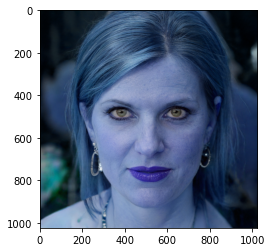

In [29]:
# test drive of the trained model - unseen image
img_arr = cv2.imread("image.jpg", cv2.COLOR_BGR2RGB)
plt.imshow(img_arr)

[[ 14  17 114 114]]
[[ 22  15 116 116]]


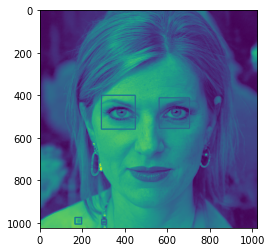

In [31]:
# run this block 2 times

# loading a face and eyes detector, using cv2's internal detection system
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
eyes = eye_cascade.detectMultiScale(gray,1.1,4) # detect eyes

for(x,y,w,h) in eyes:
    roi_gray = gray[y:y+h , x:x+w] # mark region of interest
    roi_color = img_arr[y:y+h , x:x+w] # mark region of interest for model (Mobilenet works on 3 channels RGB)
    eyess = eye_cascade.detectMultiScale(roi_gray)
    print(eyess)
    if len(eyess) == 0:
        print("no eyes")
    else:
        for (ex,ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew] # crop and store eyes
            
    cv2.rectangle(img_arr,(x,y), (x+w, y+h),(0,0,255),4)
#plt.imshow(cv2.cvtColor(eyes_roi , cv2.COLOR_BGR2RGB))

(116, 116, 3)

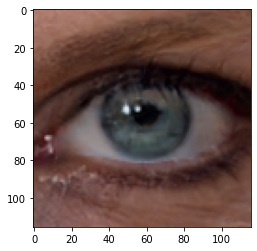

In [32]:
plt.imshow(cv2.cvtColor(eyes_roi , cv2.COLOR_BGR2RGB)) # display only eyes
eyes_roi.shape

In [33]:
# resizing and preprocessing eyes data from picture for next stage, prediction 
final_img = cv2.resize(eyes_roi,(224,224))
final_img = np.expand_dims(final_img,axis=0)
final_img = final_img / 255.0
final_img.shape

(1, 224, 224, 3)

In [34]:
pred=new_model.predict(final_img) # prediction if eyes closed or open

In [35]:
if pred > 0.5:
    print("Eyes Open")
else:
    print("Eyes Closed")

Eyes Open


In [38]:
# webcam
import winsound
frequency = 2500
duration = 1000
counter = 0 
import cv2
path = "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w , y+h) , (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyess) == 0:
            print("no eyes")
        else:
            for (ex, ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex +ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image =  final_image/255.0
    predictions = new_model.predict(final_image)
    if predictions>0.5:
        status = "Open eyes"
    else:
        counter +=1
        if counter > 5:
            winsound.Beep(frequency, duration)
            counter = 0
        status = "closed eyes"
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray,1.1,4)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y) , (x+w , y+w),(0,255,0) ,2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status,(50,50), font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow("",frame)
    if cv2.waitKey(2) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
no eyes
